# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

# Data Preprocessing

In [2]:
train_df = pd.read_csv('./Train.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [6]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [8]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [9]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [11]:
# null values

train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
(train_df['Item_Weight'].mode())

0    12.15
Name: Item_Weight, dtype: float64

In [14]:
# handle missing value
train_df['Item_Weight'].fillna(12.857645184135976, inplace=True)

In [15]:
(train_df['Outlet_Size'].mode())

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
# train_df['Outlet_Size'].fillna('Medium', inplace=True)

In [17]:
# Categorical feature
# 7 out of 12 are categorical feature
# label encoder


In [18]:
mode_of_outlet_size = train_df.pivot_table('Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [19]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
def fill_outlet_Size(x):
    if x == 'Grocery Store' or 'Supermarket Type1':
        return 'Small'
    else:
        return 'Medium'

In [21]:
missing_value = train_df['Outlet_Size'].isna()

In [22]:
train_df.loc[missing_value, 'Outlet_Size'] = train_df.loc[missing_value, 'Outlet_Type'].apply(fill_outlet_Size)

## Data Analysis

In [23]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
sns.set()

<Figure size 432x432 with 0 Axes>

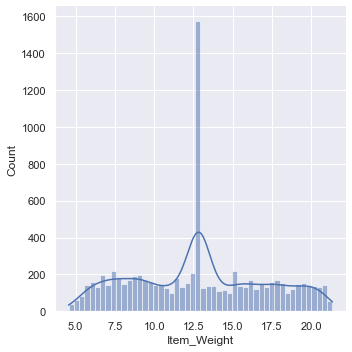

In [25]:
# item_ weight distribution
plt.figure(figsize=(6, 6))
sns.displot(train_df['Item_Weight'], bins=50, kde='hue')
plt.show()

<Figure size 432x432 with 0 Axes>

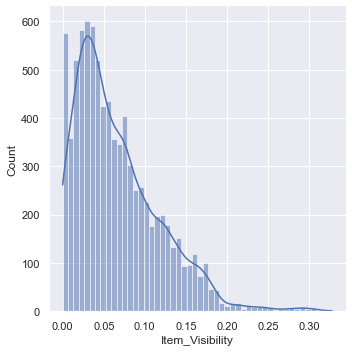

In [26]:
plt.figure(figsize=(6, 6))
sns.displot(train_df['Item_Visibility'], bins=50, kde='hue')
plt.show()

<Figure size 432x432 with 0 Axes>

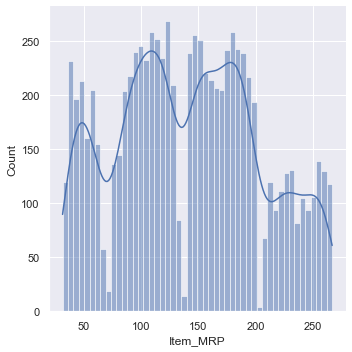

In [27]:
plt.figure(figsize=(6, 6))
sns.displot(train_df['Item_MRP'], bins=50, kde='hue')
plt.show()

<Figure size 432x432 with 0 Axes>

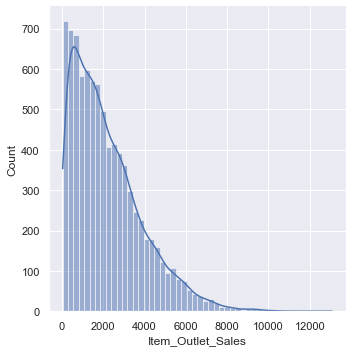

In [28]:
plt.figure(figsize=(6, 6))
sns.displot(train_df['Item_Outlet_Sales'], bins=50, kde='hue')
plt.show()

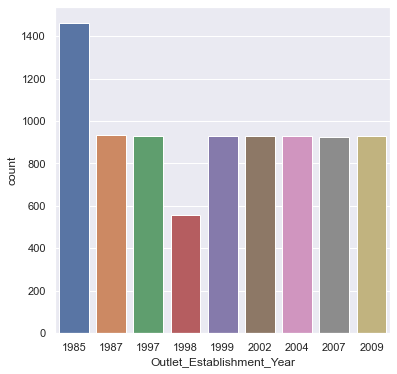

In [29]:
plt.figure(figsize=(6, 6))
sns.countplot(data=train_df, x='Outlet_Establishment_Year')
plt.show()

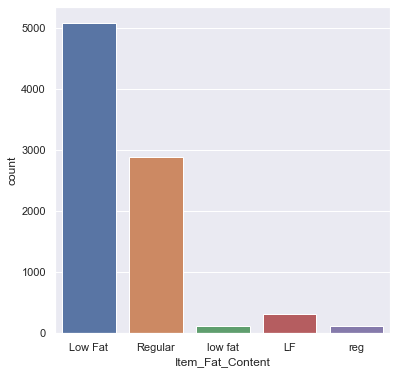

In [30]:
plt.figure(figsize=(6, 6))
sns.countplot(data=train_df, x='Item_Fat_Content')
plt.show()

In [31]:
def item_fat(x):
    if x == "low fat" or x == "LF":
        return 'Low Fat'
    elif x == 'reg':
        return 'Regular'
    else:
        return x

In [32]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(item_fat)

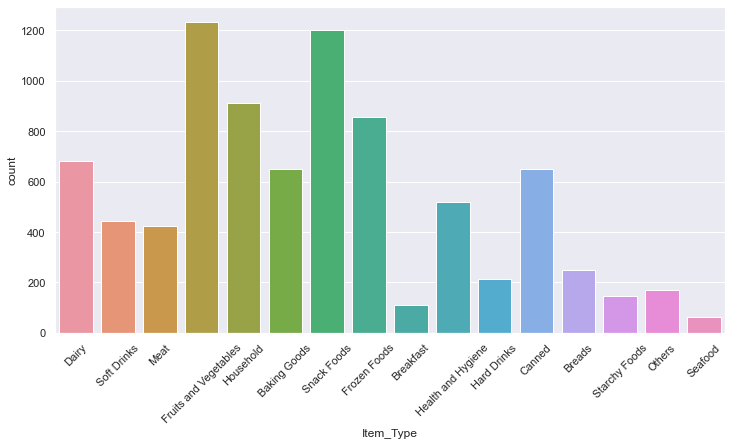

In [33]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.countplot(data=train_df, x='Item_Type')
plt.show()

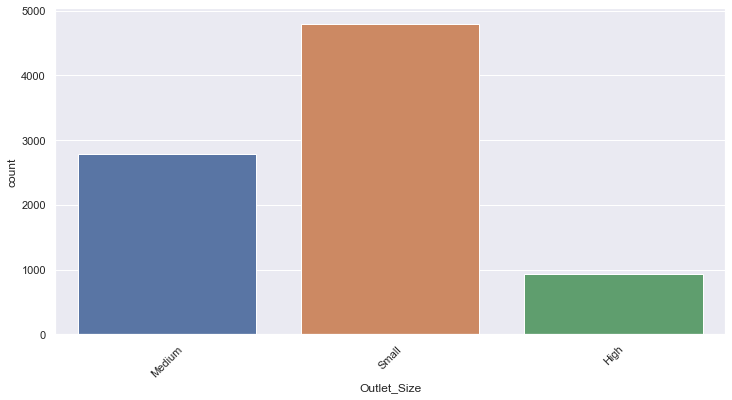

In [34]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.countplot(data=train_df, x='Outlet_Size')
plt.show()

# Data Preprocessing

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
label_encoding = LabelEncoder()

In [37]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
train_df['Item_Identifier'] = label_encoding.fit_transform(train_df['Item_Identifier'])
train_df = pd.get_dummies(train_df, columns=[
    "Item_Fat_Content",
    "Item_Type",
    "Outlet_Identifier",
    "Outlet_Size",
    "Outlet_Location_Type",
    'Outlet_Type'
])

In [39]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,1297,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


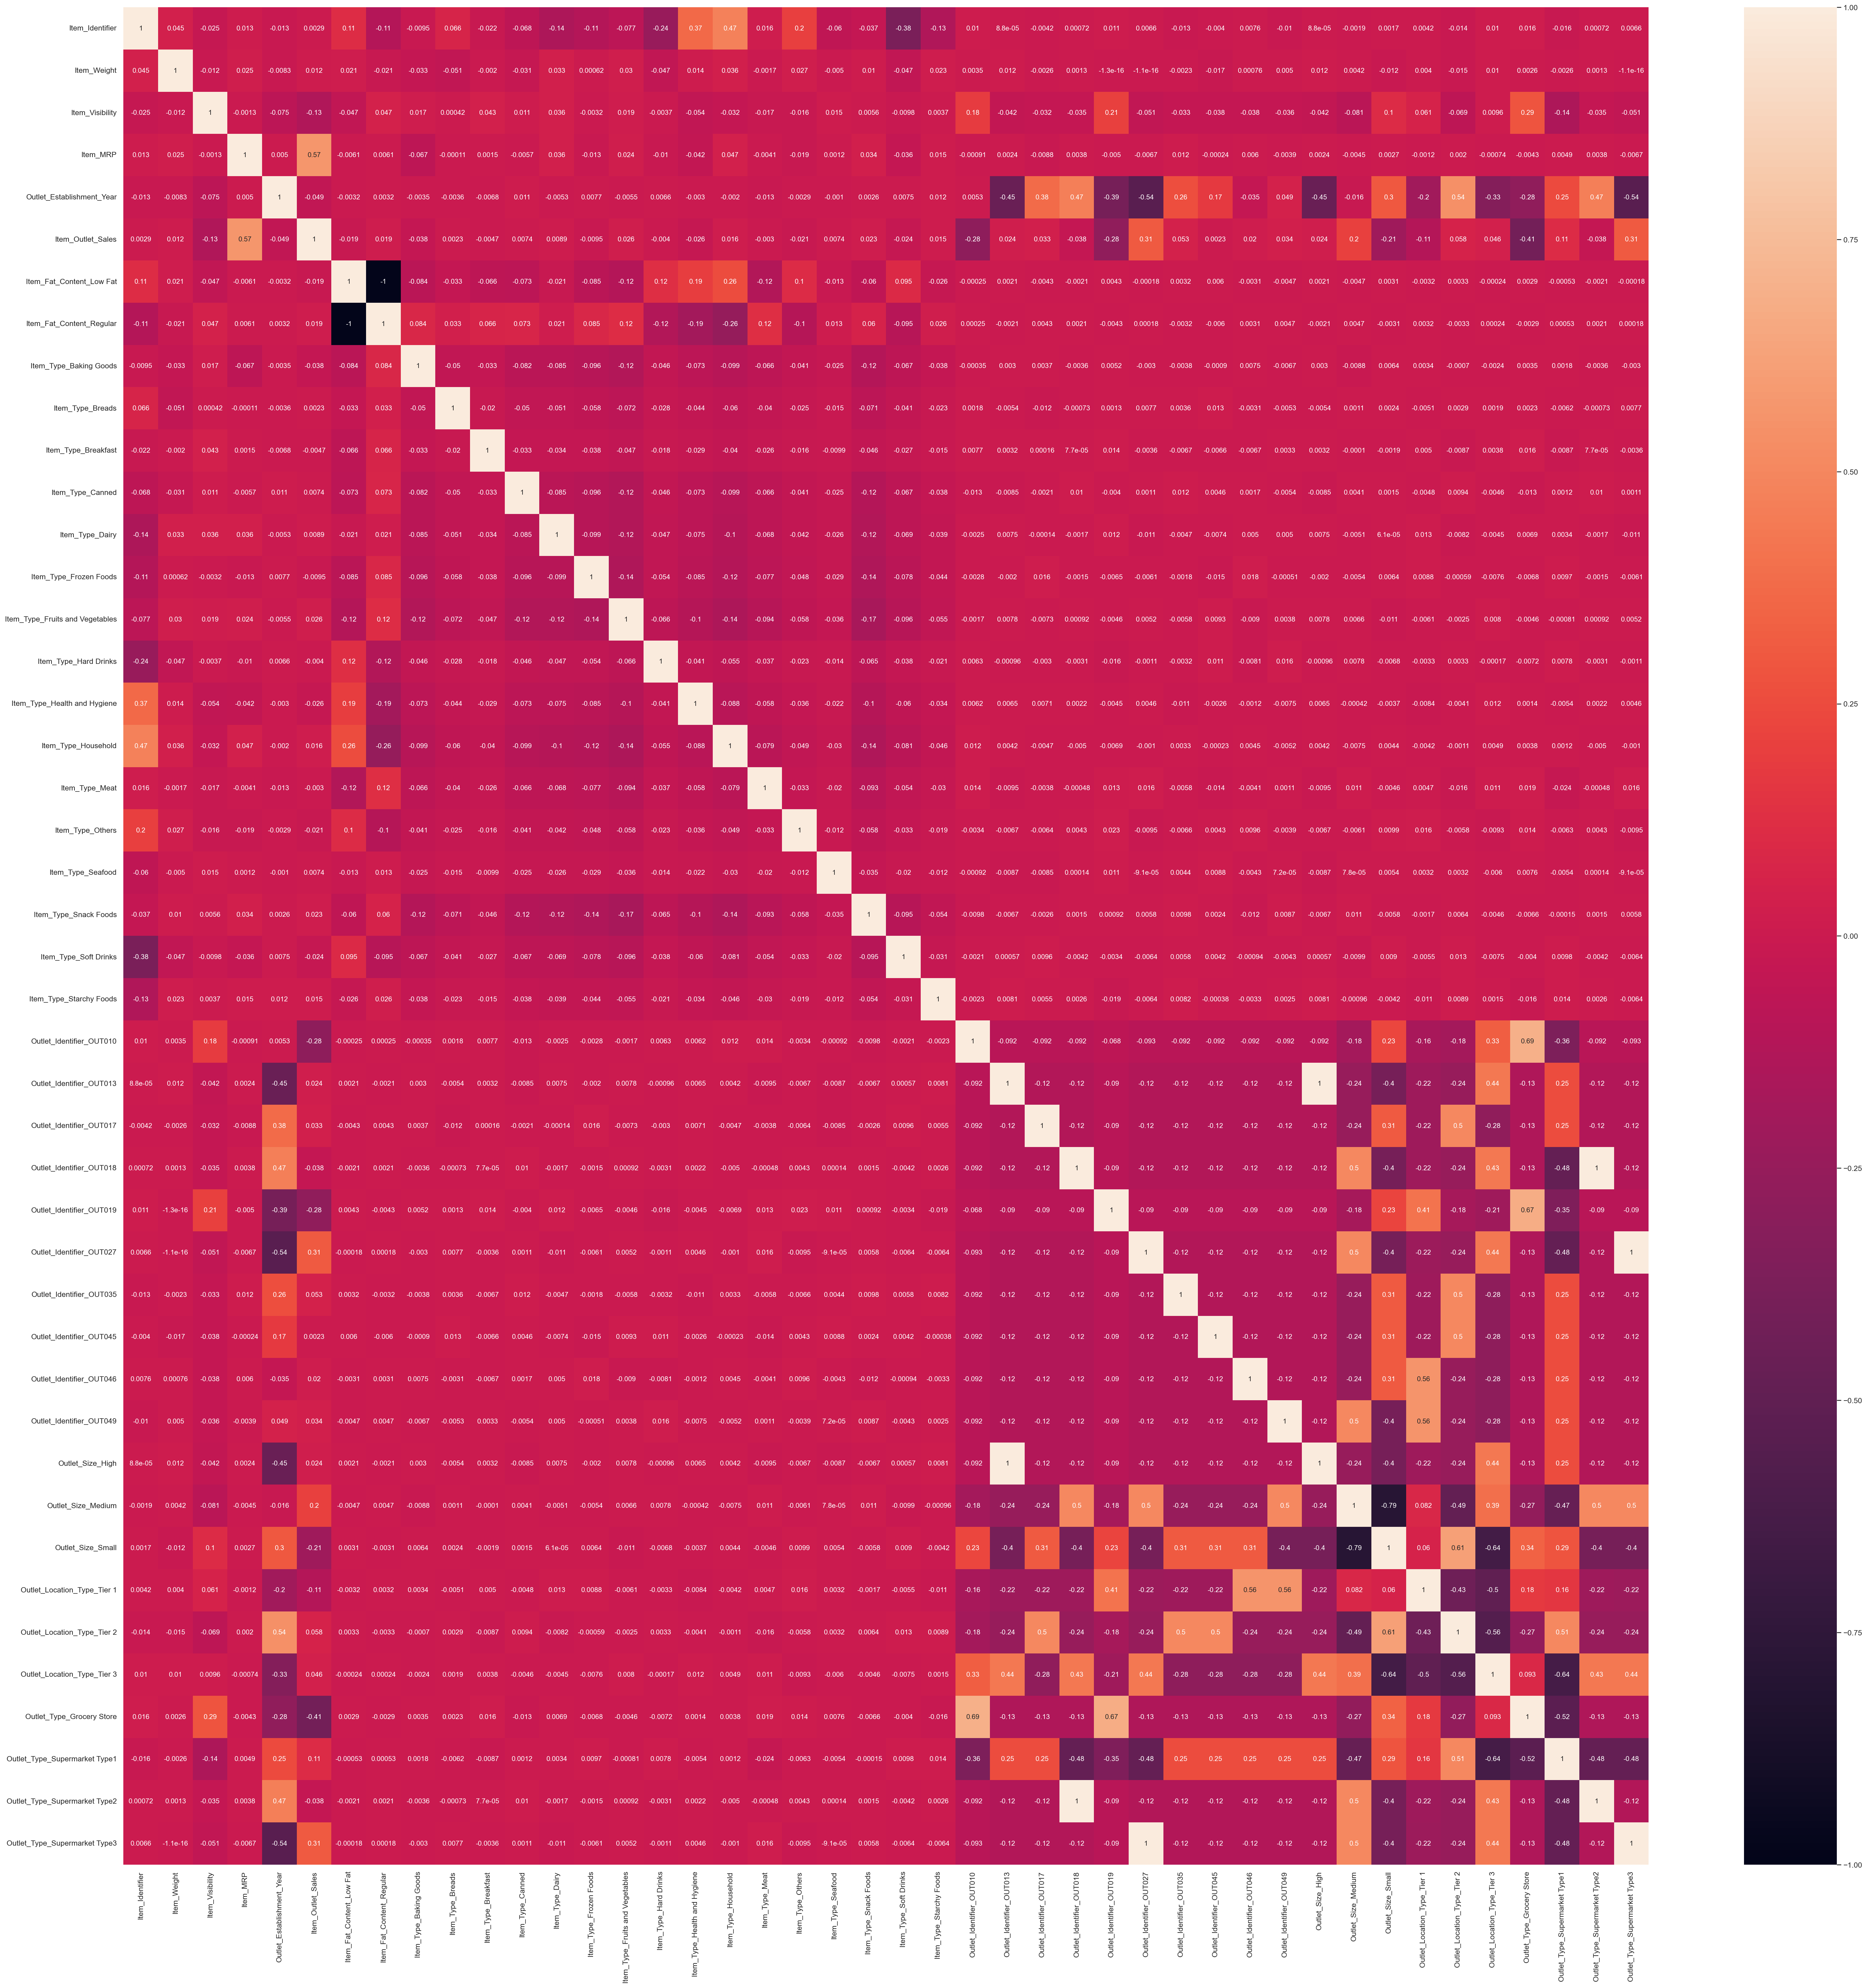

In [53]:
# plt.figure(dpi=150, figsize=(50, 50))
# sns.heatmap(train_df.corr(), annot=True)
# plt.show()

In [41]:
# splitting the data
x = train_df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = train_df['Item_Outlet_Sales']

In [42]:
# splitiing the data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [43]:
# creating model
model_1 = LinearRegression()
model_2 = XGBRegressor()

In [44]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Evaluation

In [45]:
model_1.score(x_train, y_train)

0.564531399422453

In [46]:
model_2.score(x_train, y_train)

0.8507053523466476

In [47]:
model_2.score(x_test, y_test)

0.5661579989055643

In [48]:
r2_train = metrics.r2_score(y_train, model_2.predict(x_train))

In [49]:
print(r2_train)

0.8507053523466476


In [50]:
r2_test = metrics.r2_score(y_test, model_2.predict(x_test))

In [51]:
print(r2_test)

0.5661579989055643
